In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
df = pd.read_csv('C:/Users/hetvi/Downloads/dc2/Dashboard/metropolitan-street-combined.csv')

C:\Users\hetvi\AppData\Local\Temp\ipykernel_17808\2766653075.py:10: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/hetvi/Downloads/dc2/Dashboard/metropolitan-street-combined.csv')


In [29]:
print(df['Crime type'].unique())
df = df[df['Crime type'] == 'Anti-social behaviour']

['Vehicle crime' 'Anti-social behaviour' 'Burglary'
 'Criminal damage and arson' 'Violence and sexual offences' 'Other crime'
 'Other theft' 'Theft from the person' 'Public order' 'Shoplifting'
 'Robbery' 'Drugs' 'Possession of weapons' 'Bicycle theft' 'Violent crime'
 'Public disorder and weapons']


In [30]:
print(df['Last outcome category'].unique())

[nan]


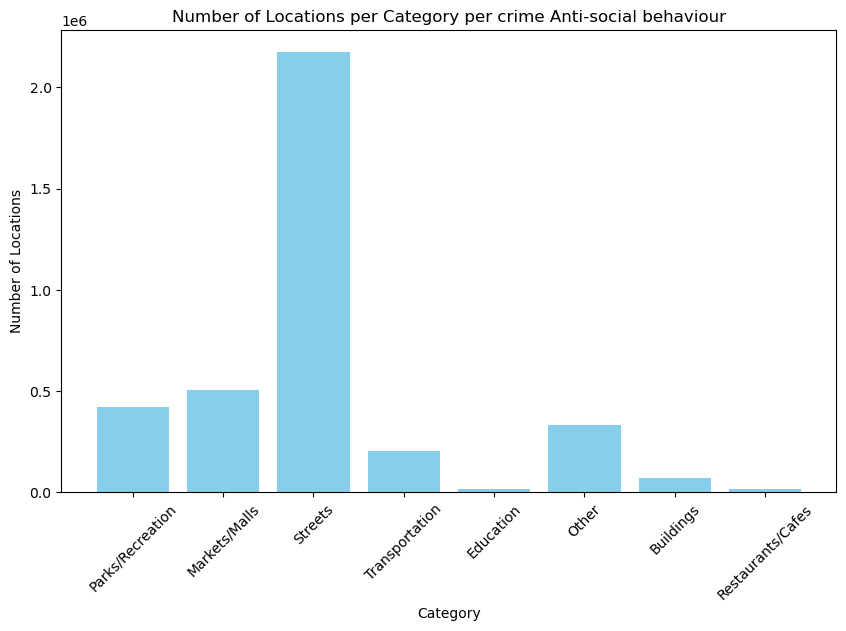

In [31]:
# Define categories and their associated regex patterns
categories = {
    "Transportation": re.compile(r"\b(subway|train|railway station|bus|airport|nderground|tube|metro|tram|petrol station|drive|parking|highway)\b", re.IGNORECASE),
    "Markets/Malls": re.compile(r"\b(shopping|mall|market|plaza|bazaar|close|supermarket|square)\b", re.IGNORECASE),
    "Parks/Recreation": re.compile(r"\b(park|garden|beach|trail|grove|sports|recreation|cinema|concert|gardens|terrace|walk|fields|hill|lodge|lawn|cottages|vineyard|path)\b", re.IGNORECASE),
    "Restaurants/Cafes": re.compile(r"\b(restaurant|cafe|diner|bistro|nightclub)\b", re.IGNORECASE),
    "Streets": re.compile(r"\b(road|avenue|lane|street|place|way|row|alley|bridge|route)\b", re.IGNORECASE),
    "Education": re.compile(r"\b(school|college|university|preschool|educational)\b", re.IGNORECASE),
    "Buildings": re.compile(r"\b(court|police station|Conference|Exhibition Centre|hospital|bank|broadway)\b", re.IGNORECASE),
}

# Function to classify locations
def classify_location(location, categories):
    for category, pattern in categories.items():
        if pattern.search(location):
            return category
    return "Other"

crime_type = df['Crime type'].unique()
for type in crime_type:
    # Read locations from a file (e.g., CSV)
    new = df[df['Crime type']== type]
    locations = new['Location'].tolist()

    # Classify each location
    classified_locations = defaultdict(int)

    for location in locations:
        category = classify_location(location, categories)
        classified_locations[category] += 1
        # if category == 'Other':
        #     print(location)

    # Convert classified locations to a DataFrame for plotting
    classified_df = pd.DataFrame.from_dict(classified_locations, orient='index', columns=['count'])
    classified_df = classified_df.reset_index().rename(columns={'index': 'category'})

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(classified_df['category'], classified_df['count'], color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Number of Locations')
    plt.title(f'Number of Locations per Category per crime {type}')
    plt.xticks(rotation=45)
    plt.show()